<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Data_AI/food_train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 84 images belonging to 10 classes.


In [4]:
training.class_indices

{'banhcuon': 0,
 'banhmi': 1,
 'bunbo': 2,
 'bundaumamtom': 3,
 'comga': 4,
 'comtam': 5,
 'goicuon': 6,
 'hutieu': 7,
 'myxao': 8,
 'phalau': 9}

In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
train=model.fit(training,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
3/3 [==============================] - 28s 7s/step - loss: 6.2555 - accuracy: 0.0357
Epoch 2/50
3/3 [==============================] - 2s 527ms/step - loss: 2.9360 - accuracy: 0.0714
Epoch 3/50
3/3 [==============================] - 2s 616ms/step - loss: 2.3362 - accuracy: 0.1786
Epoch 4/50
3/3 [==============================] - 2s 531ms/step - loss: 2.2465 - accuracy: 0.1786
Epoch 5/50
3/3 [==============================] - 2s 624ms/step - loss: 2.1847 - accuracy: 0.2262
Epoch 6/50
3/3 [==============================] - 2s 704ms/step - loss: 2.0691 - accuracy: 0.3214
Epoch 7/50
3/3 [==============================] - 2s 889ms/step - loss: 1.9081 - accuracy: 0.2619
Epoch 8/50
3/3 [==============================] - 2s 764ms/step - loss: 1.7930 - accuracy: 0.4048
Epoch 9/50
3/3 [==============================] - 2s 623ms/step - loss: 1.4429 - accuracy: 0.4643
Epoch 10/50
3/3 [==============================] - 2s 473ms/step - loss: 1.2384 - accuracy: 0.5952
Epoch 11/50
3/3 [====

In [7]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.039853088557720184
Train Accuracy 0.988095223903656


In [8]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/VN_Food.h5")

In [9]:
model_1=load_model('/content/drive/MyDrive/Data_AI/VN_Food.h5')

1/1 [==============================] - 0s 22ms/step
comtam


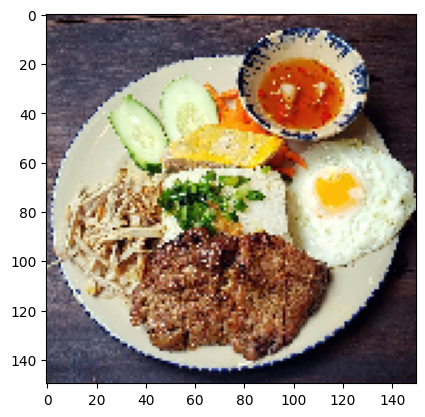

1/1 [==============================] - 0s 19ms/step
bundaumamtom


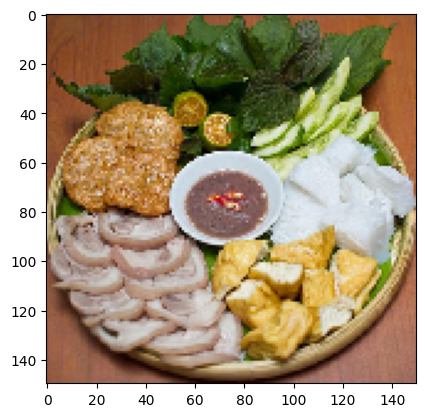

1/1 [==============================] - 0s 24ms/step
myxao


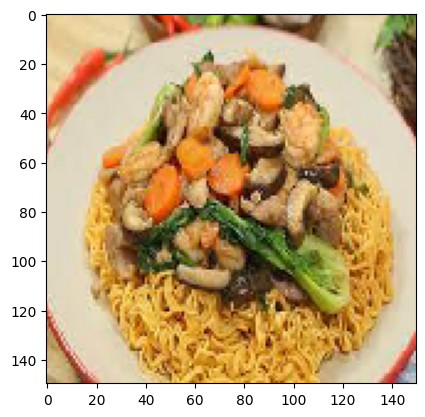

In [24]:
folder="/content/drive/MyDrive/Data_AI/food_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['banhcuon','banhmi','bunbo','bundaumamtom','comga','comtam','goicuon','hutieu','myxao','phalau']
  print(class_name[result])
  plt.show()

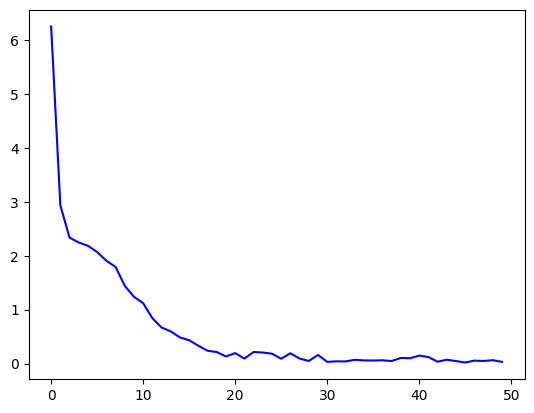

In [11]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()